In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_m13_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        47.1214 (40.8916, 53.7469) (40.7557, 53.5789) 12.8232 (Jnode 202)\n',
 't_n104        42.1855 (35.0314, 49.5531) (34.9530, 49.4601) 14.5071 (Jnode 201)\n',
 't_n105        40.9371 (33.9711, 48.1019) (33.9873, 48.1151) 14.1278 (Jnode 200)\n',
 't_n106        36.9231 (30.5555, 43.4902) (30.5565, 43.4907) 12.9342 (Jnode 199)\n',
 't_n107        35.9472 (29.7331, 42.3691) (29.6604, 42.2885) 12.6281 (Jnode 198)\n',
 't_n108        34.1302 (28.2024, 40.2841) (28.1719, 40.2496) 12.0777 (Jnode 197)\n',
 't_n109        19.0381 (15.2279, 23.0062) (15.0930, 22.8547)  7.7617 (Jnode 196)\n',
 't_n110        18.8961 (15.1137, 22.8371) (15.0395, 22.7512)  7.7117 (Jnode 195)\n',
 't_n111        18.4237 (14.7260, 22.2832) (14.6380, 22.1826)  7.5446 (Jnode 194)\n',
 't_n112        17.8539 (14.2564, 21.6027) (14.2133, 21.5446)  7.3313 (Jnode 193)\n',
 't_n113        17.1129 (13.6475, 20.7344) (13.5407, 20.6177)  7.0770 (Jnode 192)\n',
 't_n114        12.9512 (10.0445, 16.0565) ( 9.9788, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[47.1214,
 42.1855,
 40.9371,
 36.9231,
 35.9472,
 34.1302,
 19.0381,
 18.8961,
 18.4237,
 17.8539,
 17.1129,
 12.9512,
 9.5069,
 7.3252,
 3.6727,
 13.1935,
 11.3755,
 17.7029,
 11.7885,
 17.0326,
 13.7064,
 11.1607,
 9.6689,
 16.4974,
 15.5897,
 4.0575,
 18.2078,
 16.6098,
 12.9428,
 10.3942,
 11.9837,
 10.9829,
 9.3144,
 9.0683,
 31.9869,
 25.5847,
 34.323,
 31.3533,
 29.1314,
 23.8512,
 12.451,
 22.8316,
 19.9626,
 17.7134,
 15.0935,
 28.4313,
 26.1412,
 6.1065,
 2.6693,
 38.5448,
 36.3279,
 32.8619,
 31.7469,
 34.0701,
 22.3872,
 27.8982,
 21.9931,
 40.9644,
 38.4926,
 34.9472,
 33.0211,
 27.9081,
 18.3944,
 24.6886,
 34.5171,
 11.4803,
 34.8302,
 20.8984,
 20.293,
 19.8271,
 18.7799,
 17.2658,
 16.4786,
 15.8894,
 15.191,
 13.5496,
 11.7791,
 9.8882,
 13.753,
 12.9686,
 10.3339,
 11.7117,
 14.9113,
 13.7683,
 12.7427,
 10.9333,
 7.6195,
 14.0747,
 12.6507,
 11.1902,
 16.4434,
 15.6371,
 14.8592,
 13.227,
 9.8772,
 14.7296,
 9.1357,
 7.359,
 2.7374,
 20.1978,
 17.3084]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_m13_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[47.2527,
 42.4818,
 40.3045,
 36.2126,
 34.8273,
 31.8912,
 18.2936,
 18.0533,
 17.1772,
 16.2904,
 15.404,
 11.4467,
 8.3035,
 6.1082,
 3.5016,
 11.9608,
 9.8598,
 16.2446,
 10.624,
 15.3898,
 12.1856,
 9.7074,
 9.0555,
 15.0873,
 13.9324,
 4.4463,
 17.034,
 15.1519,
 11.7642,
 9.339,
 10.9314,
 9.6844,
 7.9224,
 8.8521,
 29.4591,
 24.2295,
 32.6789,
 29.3278,
 26.4383,
 21.4309,
 11.8666,
 21.1109,
 17.78,
 15.2675,
 12.5322,
 26.5513,
 23.9539,
 7.5319,
 3.4592,
 36.3213,
 33.0497,
 28.6325,
 28.0656,
 31.2765,
 20.8589,
 25.5634,
 19.3773,
 40.9551,
 38.0084,
 33.8135,
 31.019,
 26.2459,
 18.479,
 22.5194,
 33.0729,
 12.6622,
 33.6801,
 23.0631,
 21.6867,
 20.486,
 19.026,
 17.1759,
 16.1321,
 15.2183,
 14.0972,
 12.2463,
 10.3966,
 8.666,
 12.5072,
 11.567,
 9.12,
 9.9068,
 14.0184,
 12.5687,
 11.2033,
 9.4167,
 6.5114,
 12.7319,
 11.26,
 9.6427,
 15.829,
 14.5918,
 13.3216,
 11.4981,
 8.2463,
 13.6989,
 8.3721,
 6.377,
 2.5228,
 22.079,
 18.6725]

In [12]:
posterior_mean_iqtree

[47.1214,
 42.1855,
 40.9371,
 36.9231,
 35.9472,
 34.1302,
 19.0381,
 18.8961,
 18.4237,
 17.8539,
 17.1129,
 12.9512,
 9.5069,
 7.3252,
 3.6727,
 13.1935,
 11.3755,
 17.7029,
 11.7885,
 17.0326,
 13.7064,
 11.1607,
 9.6689,
 16.4974,
 15.5897,
 4.0575,
 18.2078,
 16.6098,
 12.9428,
 10.3942,
 11.9837,
 10.9829,
 9.3144,
 9.0683,
 31.9869,
 25.5847,
 34.323,
 31.3533,
 29.1314,
 23.8512,
 12.451,
 22.8316,
 19.9626,
 17.7134,
 15.0935,
 28.4313,
 26.1412,
 6.1065,
 2.6693,
 38.5448,
 36.3279,
 32.8619,
 31.7469,
 34.0701,
 22.3872,
 27.8982,
 21.9931,
 40.9644,
 38.4926,
 34.9472,
 33.0211,
 27.9081,
 18.3944,
 24.6886,
 34.5171,
 11.4803,
 34.8302,
 20.8984,
 20.293,
 19.8271,
 18.7799,
 17.2658,
 16.4786,
 15.8894,
 15.191,
 13.5496,
 11.7791,
 9.8882,
 13.753,
 12.9686,
 10.3339,
 11.7117,
 14.9113,
 13.7683,
 12.7427,
 10.9333,
 7.6195,
 14.0747,
 12.6507,
 11.1902,
 16.4434,
 15.6371,
 14.8592,
 13.227,
 9.8772,
 14.7296,
 9.1357,
 7.359,
 2.7374,
 20.1978,
 17.3084]

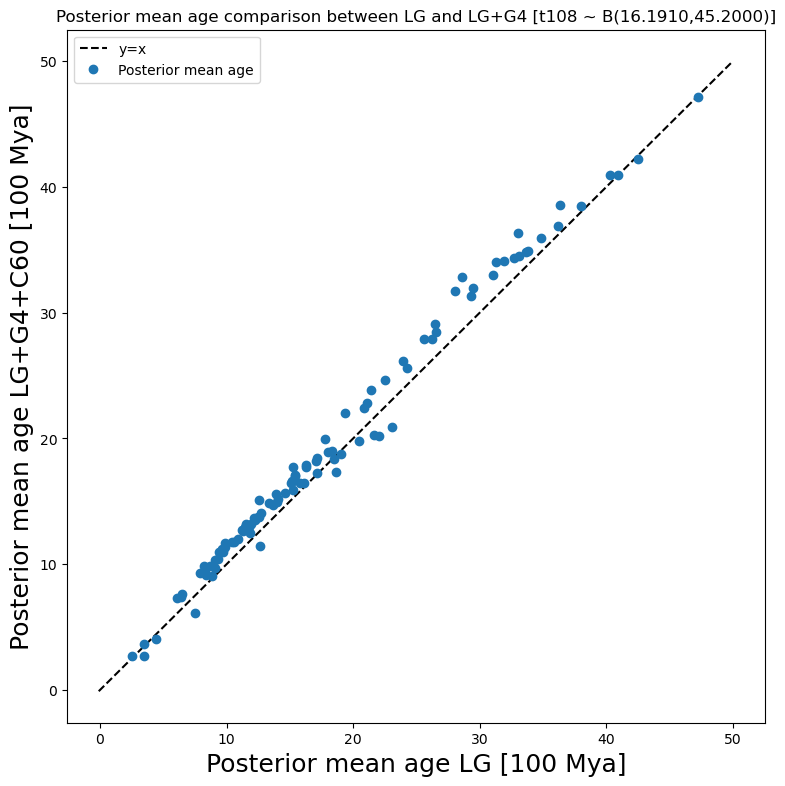

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [t108 ~ B(16.1910,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_m13_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')